<a href="https://colab.research.google.com/github/GHermano-17/AVALIACAO-DE-MODELOS-QUESTION-ANSWERING/blob/main/AVALIA%C3%87%C3%83O_DE_MODELOS_QUESTION_ANSWERING_CTEIAUFC_V1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação de bibliotecas:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import re
import collections
from tqdm import tqdm
import textwrap

### Carregamento e exploração dos dados:

In [2]:
url = 'https://raw.githubusercontent.com/GHermano-17/AVALIACAO-DE-MODELOS-QUESTION-ANSWERING/refs/heads/main/shard_017.csv'
data = pd.read_csv(url)
data.head(10)

,_id,title,text,query
0,<dbpedia:1341>,1341,Year 1341 (MCCCXLI) was a common year starting...,year 1341
1,<dbpedia:1374>,1374,Year 1374 (MCCCLXXIV) was a common year starti...,what was the year 1374
2,<dbpedia:1393>,1393,Year 1393 (MCCCXCIII) was a common year starti...,what year is 1393
3,<dbpedia:1398>,1398,Year 1398 (MCCCXCVIII) was a common year start...,what year does 1398 begin
4,<dbpedia:674>,674,Year 674 (DCLXXIV) was a common year starting ...,what does 674 mean in julian calendar
5,<dbpedia:1205>,1205,Year 1205 (MCCV) was a common year starting on...,what is 1205?
6,<dbpedia:1351>,1351,Year 1351 (MCCCLI) was a common year starting ...,when did the year 1351 start
7,<dbpedia:1371>,1371,Year 1371 (MCCCLXXI) was a common year startin...,what year is 1371
8,<dbpedia:1651>,1651,Year 1651 (MDCLI) was a common year starting o...,what is the year 1651
9,<dbpedia:675>,675,Year 675 (DCLXXV) was a common year starting o...,what is the year 675


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   _id     1000 non-null   object
 1   title   1000 non-null   object
 2   text    1000 non-null   object
 3   query   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


,_id,title,text,query
count,1000,1000,1000,1000
unique,1000,1000,1000,999
top,<dbpedia:1581>,1581,Year 1581 (MDLXXXI) was a common year starting...,who was the emperor of japan
freq,1,1,1,2


In [4]:
print(f'Nulos: {data.isnull().sum()}')
print(f'Duplicados: {data.duplicated().sum()}')

Nulos: _id      0
title    0
text     0
query    0
dtype: int64
Duplicados: 0


### Item A) Tamanho médio das perguntas - Análise do tamanho das querys e textos:

#### Neste item, calculei o tamanho médio das querys e plotei alguns gráficos que permitem visualizar o tamanho das querys e dos textos de maneira mais elaborada. O resultado obtido para o tamanho das querys foi:

- O Tamanho médio das perguntas (query) é: 26.09

In [5]:
data['query length'] = data['query'].apply(len)
data['text_length'] = data['text'].str.len()

tamanho_medio_query = data['query length'].mean()
data['query length'].describe()

,query length
count,1000.000000
mean,26.094000
std,10.289073
min,6.000000
25%,19.000000
50%,24.000000
75%,32.000000
max,77.000000


In [6]:
print(f'O tamanho médio das perguntas (query) é: {tamanho_medio_query:.2f}')

O tamanho médio das perguntas (query) é: 26.09


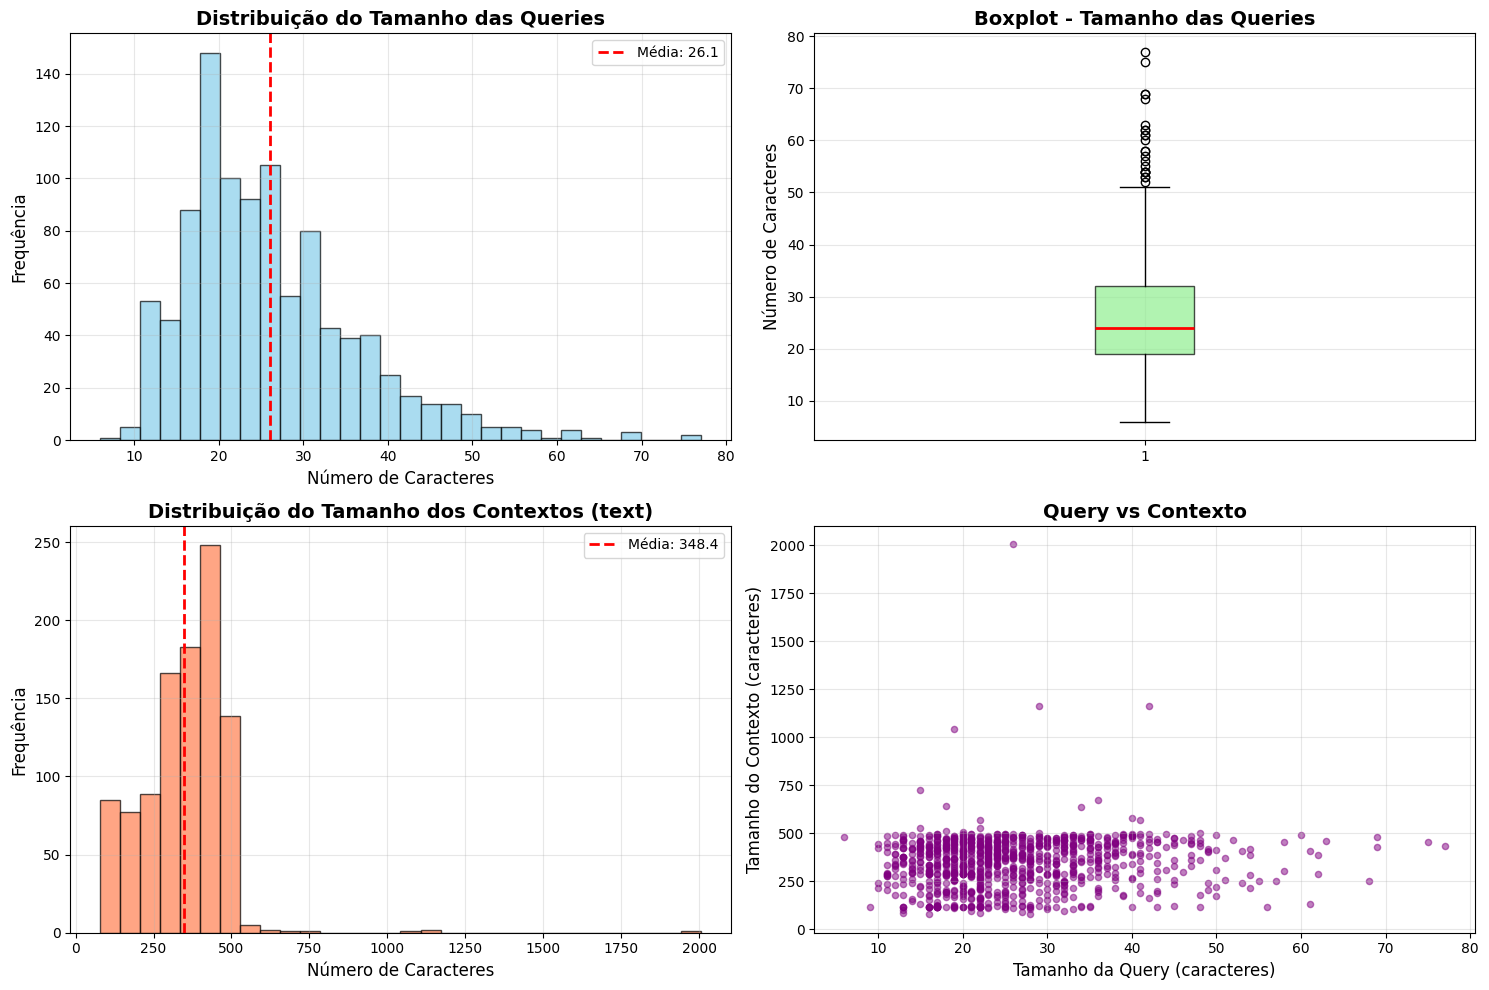

In [7]:
# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histograma - Tamanho das Queries
axes[0, 0].hist(data['query length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(data['query length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {data["query length"].mean():.1f}')
axes[0, 0].set_xlabel('Número de Caracteres', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Distribuição do Tamanho das Queries', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Boxplot - Tamanho das Queries
axes[0, 1].boxplot(data['query length'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Número de Caracteres', fontsize=12)
axes[0, 1].set_title('Boxplot - Tamanho das Queries', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Histograma - Tamanho dos Contextos
axes[1, 0].hist(data['text_length'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(data['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {data["text_length"].mean():.1f}')
axes[1, 0].set_xlabel('Número de Caracteres', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)
axes[1, 0].set_title('Distribuição do Tamanho dos Contextos (text)', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Scatter - Relação entre tamanho query vs contexto
axes[1, 1].scatter(data['query length'], data['text_length'], alpha=0.5, s=20, color='purple')
axes[1, 1].set_xlabel('Tamanho da Query (caracteres)', fontsize=12)
axes[1, 1].set_ylabel('Tamanho do Contexto (caracteres)', fontsize=12)
axes[1, 1].set_title('Query vs Contexto', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Item B) Inferência e score médio dos modelos:

#### Neste item realizei a inferência dos modelos: Utilizei o método pipeline() do Hugging Face, visando uma abordagem mais direta. Em seguida fiz 4 testes, 2 para cada modelo, visando observar como os modelos se comportavam. Por fim, apliquei os modelos nos 1000 exemplos do Dataset, armazenei os resultados em um Dataframe e obtive os seguintes resultados para o Score médio dos modelos:

- Score médio roBERTa: 0.36506
- Score médio BERT: 0.29074

In [8]:
# Modelo 1: TinyRoBERTa
qa_model1 = pipeline("question-answering", model="deepset/tinyroberta-squad2")

# Modelo 2: BERT Base
qa_model2 = pipeline("question-answering", model="deepset/bert-base-uncased-squad2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/835 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/326M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

RobertaForQuestionAnswering LOAD REPORT from: deepset/tinyroberta-squad2
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForQuestionAnswering LOAD REPORT from: deepset/bert-base-uncased-squad2
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/302 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [9]:
# Teste com um exemplo:
exemplo_idx = 0
exemplo_query = data.iloc[exemplo_idx]["query"]
exemplo_context = data.iloc[exemplo_idx]["text"]
print(f"Query do exemplo: {exemplo_query}")
print(f"Contexto do exemplo: {exemplo_context}")

resultado1 = qa_model1(question=exemplo_query, context=exemplo_context)
print("\n\nMODELO 1 - TinyRoBERTa")
print("=" * 50)
print(f"Resposta: {resultado1['answer']}")
print(f"Score: {resultado1['score']:.4f}")
print(f"Posição: start={resultado1['start']}, end={resultado1['end']}")
print("=" * 50)
# Apesar do score ter sido baixo indicado a baixa confiança do modelo em sua resposta, é possível observar que a query usada para exemplo era muito vaga, mas, mesmo assim, o modelo apresentou uma resposta condizente.

resultado2 = qa_model2(question=exemplo_query, context=exemplo_context)
print("\n\nMODELO 2 - BERT Base")
print("=" * 50)
print(f"Resposta: {resultado2['answer']}")
print(f"Score: {resultado2['score']:.4f}")
print(f"Posição: start={resultado2['start']}, end={resultado2['end']}")
print("=" * 50)
# Apesar de apresentar uma resposta mais simples, o BERT apresentou um score maior.

Query do exemplo: year 1341
Contexto do exemplo: Year 1341 (MCCCXLI) was a common year starting on Monday (link will display the full calendar) of the Julian calendar.


MODELO 1 - TinyRoBERTa
Resposta: a common year starting on Monday
Score: 0.0016
Posição: start=24, end=56


MODELO 2 - BERT Base
Resposta: Year 1341
Score: 0.1964
Posição: start=0, end=9


In [10]:
# Explorando com uma query mais objetiva:
exemplo2_idx = 1
exemplo2_query = data.iloc[exemplo2_idx]["query"]
exemplo2_context = data.iloc[exemplo2_idx]["text"]
print(f"Query do exemplo: {exemplo2_query}")
print(f"Contexto do exemplo: {exemplo2_context}")

resultado1_2 = qa_model1(question=exemplo2_query, context=exemplo2_context)
print("\n\nMODELO 1 - TinyRoBERTa")
print("=" * 50)
print(f"Resposta: {resultado1_2['answer']}")
print(f"Score: {resultado1_2['score']:.4f}")
print(f"Posição: start={resultado1_2['start']}, end={resultado1_2['end']}")
print("=" * 50)

resultado2_2 = qa_model2(question=exemplo2_query, context=exemplo2_context)
print("\n\nMODELO 2 - BERT Base")
print("=" * 50)
print(f"Resposta: {resultado2_2['answer']}")
print(f"Score: {resultado2_2['score']:.4f}")
print(f"Posição: start={resultado2_2['start']}, end={resultado2_2['end']}")
print("=" * 50)

# Temos respostas identicas vindas de ambos os modelos, todavia, TinyRoBERTa apresenta uma confiança muito maior em sua resposta.

Query do exemplo: what was the year 1374
Contexto do exemplo: Year 1374 (MCCCLXXIV) was a common year starting on Sunday (link will display the full calendar) of the Julian calendar.


MODELO 1 - TinyRoBERTa
Resposta: a common year starting on Sunday
Score: 0.3799
Posição: start=26, end=58


MODELO 2 - BERT Base
Resposta: a common year starting on Sunday
Score: 0.0816
Posição: start=26, end=58


In [11]:
# Aplicando nos 1000 exemplos:
resultado_modelo1 = []
resultado_modelo2 = []

for i in tqdm(range(len(data))):
  query = data.iloc[i]['query']
  context = data.iloc[i]['text']
  result1 = qa_model1(question=query, context=context)
  result2 = qa_model2(question=query, context=context)
  resultado_modelo1.append(result1)
  resultado_modelo2.append(result2)

100%|██████████| 1000/1000 [09:12<00:00,  1.81it/s]


In [12]:
# Salvando os resultados em um Dataframe
data_modelo1 = pd.DataFrame(resultado_modelo1)
data_modelo2 = pd.DataFrame(resultado_modelo2)

In [13]:
# Expandindo o Dataframe com os resultados para melhor visualização e noção das respostas
data_modelo1[['text', 'query']] = data[['text', 'query']]
data_modelo1

,score,start,end,answer,text,query
0,0.001637,24,56,a common year starting on Monday,Year 1341 (MCCCXLI) was a common year starting...,year 1341
1,0.379942,26,58,a common year starting on Sunday,Year 1374 (MCCCLXXIV) was a common year starti...,what was the year 1374
2,0.099518,26,39,a common year,Year 1393 (MCCCXCIII) was a common year starti...,what year is 1393
3,0.219611,50,60,on Tuesday,Year 1398 (MCCCXCVIII) was a common year start...,what year does 1398 begin
4,0.152308,23,55,a common year starting on Sunday,Year 674 (DCLXXIV) was a common year starting ...,what does 674 mean in julian calendar
...,...,...,...,...,...,...
995,0.327083,25,38,a common year,Year 1589 (MDLXXXIX) was a common year startin...,what was 1589 year in
996,0.991176,26,30,1919,"Eileen Heckart (March 29, 1919 – December 31, ...",what year was eileen hellart born
997,0.549946,97,147,a Hungarian philosopher of mathematics and sci...,Imre Lakatos (Hungarian: Lakatos Imre [ˈlɒkɒto...,who is imre lakatos
998,0.246781,26,39,a common year,Year 1587 (MDLXXXVII) was a common year starti...,what year is 1587


In [14]:
# Mesma coisa da célula anterior
data_modelo2[['text', 'query']] = data[['text', 'query']]
data_modelo2

,score,start,end,answer,text,query
0,0.196432,0,9,Year 1341,Year 1341 (MCCCXLI) was a common year starting...,year 1341
1,0.081603,26,58,a common year starting on Sunday,Year 1374 (MCCCLXXIV) was a common year starti...,what was the year 1374
2,0.195925,0,21,Year 1393 (MCCCXCIII),Year 1393 (MCCCXCIII) was a common year starti...,what year is 1393
3,0.027011,102,121,the Julian calendar,Year 1398 (MCCCXCVIII) was a common year start...,what year does 1398 begin
4,0.004156,25,55,common year starting on Sunday,Year 674 (DCLXXIV) was a common year starting ...,what does 674 mean in julian calendar
...,...,...,...,...,...,...
995,0.025866,27,57,common year starting on Sunday,Year 1589 (MDLXXXIX) was a common year startin...,what was 1589 year in
996,0.722281,26,30,1919,"Eileen Heckart (March 29, 1919 – December 31, ...",what year was eileen hellart born
997,0.356636,97,147,a Hungarian philosopher of mathematics and sci...,Imre Lakatos (Hungarian: Lakatos Imre [ˈlɒkɒto...,who is imre lakatos
998,0.214586,0,21,Year 1587 (MDLXXXVII),Year 1587 (MDLXXXVII) was a common year starti...,what year is 1587


In [17]:
# Score médio dos modelos.
score_medio_roberta = data_modelo1['score'].mean()
score_medio_bert = data_modelo2['score'].mean()

print("="*30)
print(f"Score médio roBERTa: {score_medio_roberta:.5f}\nScore médio BERT: {score_medio_bert:.5f}")
print("="*30)

Score médio roBERTa: 0.36506
Score médio BERT: 0.29074


### Item C) Overlap entre contexto e resposta.

#### Ao executar as células, obtemos os resultados:

- Overlap médio roBERTa: 99,57%
- Overlap médio BERT: 99,71%

#### Podemos observar que ambos modelos apresentaram uma alta sobreposição, indicando que as respostas estavam bem apresentadas nos textos, além de afirmar que possivelmente os modelos fizeram inferências corretas com baixa aluninação.

In [18]:
data_limpo = data.copy()
data_limpo['text'] = data_limpo['text'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()
data_limpo['query'] = data_limpo['query'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()
data_limpo.head(10)

,_id,title,text,query,query length,text_length
0,<dbpedia:1341>,1341,"[year, 1341, mcccxli, was, a, common, year, st...","[year, 1341]",9,118
1,<dbpedia:1374>,1374,"[year, 1374, mccclxxiv, was, a, common, year, ...","[what, was, the, year, 1374]",22,120
2,<dbpedia:1393>,1393,"[year, 1393, mcccxciii, was, a, common, year, ...","[what, year, is, 1393]",17,119
3,<dbpedia:1398>,1398,"[year, 1398, mcccxcviii, was, a, common, year,...","[what, year, does, 1398, begin]",25,122
4,<dbpedia:674>,674,"[year, 674, dclxxiv, was, a, common, year, sta...","[what, does, 674, mean, in, julian, calendar]",37,289
5,<dbpedia:1205>,1205,"[year, 1205, mccv, was, a, common, year, start...","[what, is, 1205]",13,117
6,<dbpedia:1351>,1351,"[year, 1351, mcccli, was, a, common, year, sta...","[when, did, the, year, 1351, start]",28,119
7,<dbpedia:1371>,1371,"[year, 1371, mccclxxi, was, a, common, year, s...","[what, year, is, 1371]",17,122
8,<dbpedia:1651>,1651,"[year, 1651, mdcli, was, a, common, year, star...","[what, is, the, year, 1651]",21,196
9,<dbpedia:675>,675,"[year, 675, dclxxv, was, a, common, year, star...","[what, is, the, year, 675]",20,288


In [19]:
text_overlap = data_limpo['text']
answer_overlap_roberta = data_modelo1['answer'] .str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()
answer_overlap_bert = data_modelo2['answer'] .str.lower().str.replace(r'[^\w\s]', '', regex=True).str.split()

In [20]:
def overlap(context, answer):
    context = set(context)
    answer = set(answer)
    if len(answer) == 0:
        return 0
    return len(context.intersection(answer)) / len(answer) * 100

In [21]:
overlap_roberta = []
overlap_bert = []
for i in tqdm(range(len(data_limpo))):
    overlap_roberta.append(overlap(text_overlap[i], answer_overlap_roberta[i]))
    overlap_bert.append(overlap(text_overlap[i], answer_overlap_bert[i]))

mean_overlap_roberta = sum(overlap_roberta) / len(overlap_roberta) if len(overlap_roberta) > 0 else 0
mean_overlap_bert = sum(overlap_bert) / len(overlap_bert) if len(overlap_bert) > 0 else 0

print(f'\n\nOverlap médio roBERTa: {mean_overlap_roberta:.2f}%')
print(f'Overlap médio BERT: {mean_overlap_bert:.2f}%')

100%|██████████| 1000/1000 [00:00<00:00, 42568.37it/s]



Overlap médio roBERTa: 99.57%
Overlap médio BERT: 99.71%


### Item D) Análise qualitativa por amostragem guiada.

In [22]:
top_10_bert = data_modelo2.sort_values(by='score', ascending=False).head(10).reset_index(drop=True)
top_10_piores_bert = data_modelo2.sort_values(by='score', ascending=False).tail(10).reset_index(drop=True)
top_10_roberta = data_modelo1.sort_values(by='score', ascending=False).head(10).reset_index(drop=True)
top_10_piores_roberta = data_modelo1.sort_values(by='score', ascending=False).tail(10).reset_index(drop=True)

In [23]:
top_10_bert

,score,start,end,answer,text,query
0,0.995754,0,5,Venus,"Venus (/ˈviːnəs/, Classical Latin: /ˈwɛnʊs/) i...",what goddess has a son named aeneas?
1,0.987478,0,20,Great Barrier Island,Great Barrier Island lies in the outer Hauraki...,what is the big island of new zealand called?
2,0.984041,48,56,Thursday,Year 1103 (MCIII) was a common year starting o...,which day was the year 1103?
3,0.981196,47,55,Saturday,Year 1155 (MCLV) was a common year starting on...,what day is 1155?
4,0.980056,0,29,"Stephanie Lynn ""Stevie"" Nicks","Stephanie Lynn ""Stevie"" Nicks (born May 26, 19...",who is the singer of fleetwood mac
5,0.979680,101,108,English,Norman Cook (born Quentin Leo Cook on 31 July ...,what nationality is fatboy slim
6,0.979160,117,130,Peter Watkins,The War Game is a 1965 television drama-docume...,who wrote the war game?
7,0.979019,0,7,Mercury,Mercury (/ˈmɜrkjʉri/; Latin: Mercurius [mɛrˈkʊ...,who is the god mercurius
8,0.978052,73,87,20 March 43 BC,Publius Ovidius Naso (Classical Latin: [ˈpʊb.l...,when was ovid born and what year
9,0.976775,20,39,William Blake Crump,Blake Edwards (born William Blake Crump; July ...,what is blake edwards real name


### Análise 10 melhores BERT:

1. Resposta simples, direta e correta. A query estava bem elaborada e a resposta da pergunta estava dentro do texto. (Bom)

2. Nesse caso, o modelo apresentou uma resposta consistente dado o contexto que lhe foi apresentado. A query, por sua vez, pedia como era chamada a "ilha grande" de Nova Zelândia, o texto indica que a ilha apresentada e a 6° maior, vale o questionamente de como seria sua resposta caso outras ilhas grandes fossem apresentadas também no texto. Mesmo assim, a resposta está condizente com o modelo o qual foi apresentado. (Bom)

3. Pergunta pode passar uma ideia errada, pois pergunta "que dia foi o ano 1103", apesar disso, o modelo apresentou uma resposta consistente indicando o dia da semana o qual o ano começou. (Bom)

4. Novamente, outra pergunta ambigua assim como no terceiro exemplo, o modelo fez o mesmo e indicou o dia da semana o qual o ano começou. (Ok)

5. Resposta correta. A query estava consistente e o modelo apresentou uma resposta extraída diretamente do texto. (Bom)

6. A pergunta pode levar a uma resposta erronea dado que "English" não é uma nacionalidade, todavia, dado o contexto que foi dado ao modelo, pode-se dizer que ele apresentou uma resposta consistente ainda assim. (Bom - Ok)

7. Boa query, resposta correta e extraída diretamente do texto. (Bom)

8. Resposta correta extraída diretamente do texto. (Bom)

9. Boa resposta extraída diretamente do contexto, a query foi bem formulada, apresentando no enunciado o outro nome do sujeito da pergunta. (Bom)

10. Boa query e boa resposta extraída diretamente do contexto. (Bom)

In [32]:
print("="*50)
print("Top 10 BERT")
print("="*50 + "\n")
for i in range(len(top_10_bert)):
  print(f"Exemplo {i+1}:")
  print(textwrap.fill(f"- Contexto: {top_10_bert.iloc[i]['text']}", width=120))
  print(textwrap.fill(f"- Query: {top_10_bert.iloc[i]['query']}", width=120))
  print(textwrap.fill(f"- Resposta: {top_10_bert.iloc[i]['answer']}", width=120))
  print("\n" + "="*80 + "\n")

Top 10 BERT

Exemplo 1:
- Contexto: Venus (/ˈviːnəs/, Classical Latin: /ˈwɛnʊs/) is the Roman goddess whose functions encompassed love, beauty,
sex, fertility, prosperity and desire. In Roman mythology, she was the mother of the Roman people through her son,
Aeneas, who survived the fall of Troy and fled to Italy. Julius Caesar claimed her as his ancestor.
- Query: what goddess has a son named aeneas?
- Resposta: Venus


Exemplo 2:
- Contexto: Great Barrier Island lies in the outer Hauraki Gulf, New Zealand, 100 kilometres (62 mi) north-east of
central Auckland. With an area of 285 square kilometres (110 sq mi) it is the sixth-largest island of New Zealand and
fourth-largest in the main chain. Its highest point, Mount Hobson, is 621 metres (2,037 ft) above sea level. The local
authority is the Auckland Council.The island was initially exploited for its minerals and kauri trees and saw only
limited agriculture.
- Query: what is the big island of new zealand called?
- Resposta: Great Bar

### Análise 10 piores BERT:

1. A query pergunta sobre "Leo III" mas o contexto fala sobre "Leo VII", pessoas distintas. O modelo respondeu "Alberic II" que está no texto, mas a relação com a query é equivocada. Score baixo justificado. (Ruim)

2. A query pergunta sobre "Caroline II" mas o contexto é sobre "Carol II", novamente pessoas distintas. O modelo respondeu sobre a pessoa errada. Score baixo justificado. (Ruim)

3. A query pergunta sobre sistemas operacionais para celular, mas o Palm OS era primariamente para PDAs, não smartphones. O modelo extraiu uma resposta presente no texto mas imprecisa para a pergunta. (Parcialmente correto)

4. Query completamente malformada com a palavra "spectrum" repetida três vezes. O modelo pegou uma definição matemática específica para uma query genérica e quebrada. Score baixo totalmente justificado. (Ruim)

5. A query pergunta sobre "CMLXVII" mas o contexto é sobre "CMLXVIII", números romanos diferentes. O modelo respondeu sobre o contexto errado. (Ruim)

6. A sigla na query é "MIK" enquanto o contexto fala sobre "UNMIK". Apesar do erro na query, o modelo curiosamente entregou uma resposta razoável sobre a missão da ONU. Score baixo justificado pela inconsistência. (Parcialmente correto)

7. A query menciona "std rocket" sem qualquer relação com "nuclear thermal rocket". O modelo forçou uma resposta sem correspondência real com a query. Este é o exemplo mais claro de alucinação entre os 25 analisados. (Ruim - Alucinação)

8. A query pergunta especificamente sobre Austrália, mas o modelo respondeu "Indonesia", que aparece no contexto mas não tem relação com o que foi perguntado. Segundo exemplo mais claro de alucinação. (Ruim - Alucinação)

9. A query pergunta quando o hospital Johns Hopkins foi fundado, mas o modelo respondeu 1876, que é o ano de fundação da universidade. O contexto não menciona explicitamente a data de fundação do hospital. Resposta incorreta apesar de extraída do texto. (Ruim)

10. Query vaga ("verbal definition") e resposta incompleta ("A verb"). O modelo capturou algo relacionado mas não respondeu de forma satisfatória. (Parcialmente correto)

In [33]:
print("="*50)
print("Top 10 PIORES BERT")
print("="*50 + "\n")
for i in range(len(top_10_piores_bert)):
  print(f"Exemplo {i+1}:")
  print(textwrap.fill(f"- Contexto: {top_10_piores_bert.iloc[i]['text']}", width=120))
  print(textwrap.fill(f"- Query: {top_10_piores_bert.iloc[i]['query']}", width=120))
  print(textwrap.fill(f"- Resposta: {top_10_piores_bert.iloc[i]['answer']}", width=120))
  print("\n" + "="*80 + "\n")

Top 10 PIORES BERT

Exemplo 1:
Contexto: Pope Leo VII (Latin: Leo VII; died 13 July 939) was Pope from 3 January 936 to his death in 939. He was
preceded by Pope John XI and followed by Pope Stephen VIII.  Leo VII's election to the papacy was secured by Alberic II
of Spoleto, the ruler of Rome at the time. Alberic wanted to choose the pope so that the papacy would continue to yield
to his authority. Leo was the priest of the church of St. Sixtus in Rome, thought to be a Benedictine monk.
Query: who did leo iii choose to serve as papacy
Resposta: Alberic II


Exemplo 2:
Contexto: Carol II (15 October 1893 – 4 April 1953) reigned as King of Romania from 8 June 1930 until 6 September 1940.
He was the first member of the Romanian royal family to be raised in the Orthodox faith.
Query: where is caroline ii from
Resposta: Romania


Exemplo 3:
Contexto: Palm OS (also known as Garnet OS) is a mobile operating system initially developed by Palm, Inc., for personal
digital assistants (PDAs) in 1

### Análise 10 Melhores RoBERTa:

1. Boa query e resposta correta extraída diretamente do contexto. Vale notar que a query pergunta quando o helicóptero foi "desenvolvido" e o modelo respondeu 1952, que é o ano do desenvolvimento, não do primeiro voo (1956). Demonstra boa compreensão semântica. (Bom)

2. Query bem formulada e resposta correta extraída diretamente do contexto. (Bom)

3. Mesmo caso analisado nos melhores do BERT - query ambígua sobre "qual dia foi o ano", mas o modelo respondeu consistentemente com o dia da semana em que o ano começou. (Ok)

4. Mesmo caso analisado nos melhores do BERT - "English" tecnicamente é uma origem regional, não uma nacionalidade formal. Limitação do contexto fornecido. (Bom - Ok)

5. Query direta e resposta correta. O modelo identificou corretamente Thom Yorke como vocalista entre os vários membros listados no contexto. (Bom)

6. Boa query e resposta correta extraída diretamente do contexto. (Bom)

7. Query interessante e ligeiramente ambígua, misturando "rei" e "imperador". O modelo identificou corretamente Carausius como o terceiro imperador mencionado no contexto. (Bom)

8. Query simples e direta, resposta correta e objetiva. (Bom)

9. A query contém um erro de digitação ("hellart" ao invés de "heckart"), mesmo assim o modelo identificou corretamente o ano de nascimento. Demonstra robustez do modelo a erros ortográficos na query. (Bom)

10. A query tem um erro ("lescaut en novel" ao invés de "lescaut novel"), mas o modelo respondeu corretamente com o ano de publicação. Novamente demonstra robustez a erros na query. (Bom)


In [34]:
print("="*50)
print("Top 10 roBERTa")
print("="*50 + "\n")
for i in range(len(top_10_roberta)):
  print(f"Exemplo {i+1}:")
  print(textwrap.fill(f"Contexto: {top_10_roberta.iloc[i]['text']}", width=120))
  print(textwrap.fill(f"Query: {top_10_roberta.iloc[i]['query']}", width=120))
  print(textwrap.fill(f"Resposta: {top_10_roberta.iloc[i]['answer']}", width=120))
  print("\n" + "="*80 + "\n")

Top 10 roBERTa

Exemplo 1:
Contexto: The Bell UH-1 Iroquois (unofficially Huey) is a military helicopter powered by a single turboshaft engine,
with two-bladed main and tail rotors. The helicopter was developed by Bell Helicopter to meet the United States Army's
requirement for a medical evacuation and utility helicopter in 1952, and it first flew on 20 October 1956.
Query: what year was the iroquois helicopter developed
Resposta: 1952


Exemplo 2:
Contexto: Francesco Cilea (also Cilèa; Palmi, 23 July 1866 – Varazze, 20 November 1950) was an Italian composer. Today
he is particularly known for his operas L'arlesiana and Adriana Lecouvreur.
Query: who wrote l'arlesiana opera
Resposta: Francesco Cilea


Exemplo 3:
Contexto: Year 1103 (MCIII) was a common year starting on Thursday (link will display the full calendar) of the Julian
calendar.
Query: which day was the year 1103?
Resposta: Thursday


Exemplo 4:
Contexto: Norman Cook (born Quentin Leo Cook on 31 July 1963), also known by his 

## Análise 10 Piores RoBERTa:

1. Query completamente sem sentido ("what is a sinist"), sem qualquer relação com o contexto sobre mitologia nórdica. O modelo respondeu "Anglo-Saxon paganism" que está no texto mas não tem relação alguma com a query. Alucinação clara. (Ruim - Alucinação)

2. Query vaga com "and examples" que não corresponde a nenhuma informação específica no contexto. O modelo respondeu apenas "Computer-aided design" que é uma resposta incompleta para uma definição. (Parcialmente correto)

3. A query pergunta sobre "mês" ("what is the month 1097") mas o contexto não menciona nenhum mês, apenas o dia da semana. O modelo respondeu "Thursday" que é irrelevante para a pergunta. (Ruim)

4. Mesmo caso dos piores do BERT - query malformada com "spectrum" repetido. O modelo respondeu "commutative ring R", diferente do BERT que respondeu "the set of all prime ideals of R". Ambas as respostas são igualmente inadequadas para a query quebrada. (Ruim)

5. Query extremamente malformada misturando Israel, Palestina e Taliban em uma mesma pergunta sem sentido. O modelo respondeu "home demolitions" que está no contexto mas não responde nada relevante. Segundo exemplo mais claro de alucinação. (Ruim - Alucinação)

6. A query pergunta sobre "communism" mas o contexto fala sobre a Comunidade dos Estados Independentes (CIS). O modelo confundiu "Commonwealth" com "communism" e respondeu de forma incorreta. Limitação semântica relevante. (Ruim)

7. A query pergunta sobre "emergence physics" especificamente, mas o contexto aborda emergence de forma filosófica e sistêmica. A resposta é parcialmente válida mas não responde a física especificamente. (Parcialmente correto)

8. A query contém erro ortográfico ("uncted" ao invés de "unctad"). Diferente dos exemplos 9 e 10 dos melhores do RoBERTa, aqui o erro ortográfico é mais grave e o modelo ainda assim extraiu o nome completo da organização. Curiosamente um resultado razoável apesar da query errada. (Ok)

9. A query não é uma pergunta, é apenas o título do livro. O modelo respondeu exatamente o título, sem agregar nenhuma informação. Score baixo totalmente justificado. (Ruim)

10. A query menciona "Samantha Condorcet" que não existe no contexto, que fala sobre "Nicolas de Condorcet". O modelo ignorou "Samantha" e extraiu o nome completo de Nicolas, respondendo sobre a pessoa errada. (Ruim)


In [27]:
print("="*50)
print("Top 10 PIORES roBERTa")
print("="*50 + "\n")
for i in range(len(top_10_piores_roberta)):
  print(f"Exemplo {i+1}:")
  print(textwrap.fill(f"Contexto: {top_10_piores_roberta.iloc[i]['text']}", width=120))
  print(textwrap.fill(f"Query: {top_10_piores_roberta.iloc[i]['query']}", width=120))
  print(textwrap.fill(f"Resposta: {top_10_piores_roberta.iloc[i]['answer']}", width=120))
  print("\n" + "="*80 + "\n")

Top 10 PIORES roBERTa

Exemplo 1:
Contexto: In Old Norse, ǫ́ss (or áss, ás, plural æsir; feminine ásynja, plural ásynjur) is the term denoting a member of the principal pantheon in the indigenous Germanic religion known as Norse religion. This pantheon includes Odin, Frigg, Thor, Baldr and Týr. The second pantheon comprises the Vanir. In Norse mythology, the two pantheons wage the Æsir-Vanir War, which results in a unified pantheon.The cognate term in Old English is ōs (plural  ēse) denoting a deity in Anglo-Saxon paganism.
Query: what is a sinist
Resposta: Anglo-Saxon paganism


Exemplo 2:
Contexto: Computer-aided design (CAD) is the use of computer systems to assist in the creation, modification, analysis, or optimization of a design. CAD software is used to increase the productivity of the designer, improve the quality of design, improve communications through documentation, and to create a database for manufacturing. CAD output is often in the form of electronic files for print, ma

## Análise 5 Exemplos com Respostas Diferentes:

1. Ambos os modelos respondem corretamente onde Tilburg está localizada, porém com uma diferença sutil: RoBERTa omite o "located in" enquanto BERT o inclui. Semanticamente equivalentes, mas RoBERTa apresenta uma resposta ligeiramente mais limpa e direta com score maior. (Bom - RoBERTa superior)

2. Caso interessante onde ambos identificam a mesma entidade mas com granularidades diferentes. RoBERTa extraiu apenas o nome da instituição ("Istituto per la Ricostruzione Industriale") enquanto BERT incluiu a descrição ("Italian state holding company..."). Vale notar que o contexto descreve uma situação passada (1932-1986), portanto nenhum dos dois respondeu quem é o dono atual. RoBERTa foi significativamente mais confiante (0.71 vs 0.14). (Parcialmente correto - RoBERTa superior)

3. Query vaga ("what is a year 738") que confundiu ambos os modelos. RoBERTa extraiu a descrição do ano enquanto BERT respondeu apenas "the Julian calendar", que é ainda menos informativo. Nenhuma das respostas é satisfatória, mas RoBERTa se saiu melhor com score maior. (Ruim - RoBERTa levemente superior)

4. Query clara sobre definição de "backronym". RoBERTa respondeu "a specially constructed phrase" que captura a essência da definição, enquanto BERT respondeu apenas "A backronym or bacronym", que é essencialmente uma tautologia - definir uma palavra repetindo ela mesma. RoBERTa claramente superior aqui, com score também maior. (RoBERTa correto, BERT incorreto)

5. Query direta e bem formulada. Ambos os modelos extraíram essencialmente a mesma resposta ("French sociologist, social psychologist and philosopher"), com BERT incluindo o artigo "a" no início. RoBERTa novamente mais confiante (0.47 vs 0.15). (Bom - RoBERTa superior)

---

## Padrão Geral dos 5 Exemplos:

Em todos os casos onde houve divergência, o **RoBERTa se mostrou superior**, tanto em qualidade de resposta quanto em score.

In [28]:
# Encontrar exemplos onde as respostas são diferentes
respostas_diferentes = []

for i in range(len(data_modelo1)):
    answer_m1 = data_modelo1.iloc[i]['answer']
    answer_m2 = data_modelo2.iloc[i]['answer']

    # Se as respostas forem diferentes, guardar o índice
    if answer_m1 != answer_m2:
        respostas_diferentes.append(i)

print(f"Total de exemplos com respostas diferentes: {len(respostas_diferentes)}")

# Pegar 5 exemplos aleatórios (ou os primeiros 5)
import random
indices_diferentes = random.sample(respostas_diferentes, min(5, len(respostas_diferentes)))

# OU se preferir os primeiros 5:
# indices_diferentes = respostas_diferentes[:5]

print("\n" + "="*50)
print("5 EXEMPLOS COM RESPOSTAS DIFERENTES")
print("="*50 + "\n")

for idx, i in enumerate(indices_diferentes):
    print(f"Exemplo {idx+1} (índice original: {i}):")
    print(textwrap.fill(f"Contexto: {data.iloc[i]['text']}", width=120))
    print(f"Query: {data.iloc[i]['query']}")
    print(f"\n--- TinyRoBERTa ---")
    print(f"Resposta: {data_modelo1.iloc[i]['answer']}")
    print(f"Score: {data_modelo1.iloc[i]['score']:.4f}")
    print(f"\n--- BERT Base ---")
    print(f"Resposta: {data_modelo2.iloc[i]['answer']}")
    print(f"Score: {data_modelo2.iloc[i]['score']:.4f}")
    print("\n" + "="*80 + "\n")

Total de exemplos com respostas diferentes: 570

5 EXEMPLOS COM RESPOSTAS DIFERENTES

Exemplo 1 (índice original: 530):
Contexto: Tilburg [ˈtɪlbʏr(ə)x] is a landlocked municipality and a city in the Netherlands, located in the southern province of Noord-Brabant.Tilburg municipality also includes the villages of Berkel-Enschot and Udenhout. With a population of 210,289, it is the second largest city of Noord-Brabant, and the sixth largest city of the Netherlands.
Query: where is tilburg

--- TinyRoBERTa ---
Resposta: southern province of Noord-Brabant
Score: 0.2649

--- BERT Base ---
Resposta: located in the southern province of Noord-Brabant
Score: 0.2296


Exemplo 2 (índice original: 518):
Contexto: Alfa Romeo Automobiles S.p.A. (Italian pronunciation: [ˈalfa roˈmɛːo]) is an Italian car manufacturer.  Founded as A.L.F.A. "\Anonima Lombarda Fabbrica Automobili", translating to Anonymous Lombard Automobile Factory in English) on June 24, 1910, in Milan, the company has been involved in 